In [122]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read in the data
df = pd.read_csv(r'C:\Users\adria\OneDrive\Documents\Adrian\Developer\Portfolio Project - Alex The Analyst\Project 4 - Correlation in Python\movies.csv')

In [123]:
# preview the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [124]:
# test for missing data
for col in df.columns:
    missing_pc = np.mean(df[col].isna())
    print('{} : {}%'.format(col, missing_pc))

name : 0.0%
rating : 0.010041731872717789%
genre : 0.0%
year : 0.0%
released : 0.0002608242044861763%
score : 0.0003912363067292645%
votes : 0.0003912363067292645%
director : 0.0%
writer : 0.0003912363067292645%
star : 0.00013041210224308815%
country : 0.0003912363067292645%
budget : 0.2831246739697444%
gross : 0.02464788732394366%
company : 0.002217005738132499%
runtime : 0.0005216484089723526%


In [125]:
# drop rows with missing data
df_cleaned = df.copy().dropna()

In [126]:
# test for missing data again
for col in df_cleaned.columns:
    missing_pc = np.mean(df_cleaned[col].isna())
    print('{} : {}%'.format(col, missing_pc))

name : 0.0%
rating : 0.0%
genre : 0.0%
year : 0.0%
released : 0.0%
score : 0.0%
votes : 0.0%
director : 0.0%
writer : 0.0%
star : 0.0%
country : 0.0%
budget : 0.0%
gross : 0.0%
company : 0.0%
runtime : 0.0%


In [127]:
# data types for columns
df_cleaned.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [128]:
# change data type of budget, gross earnings and votes to integer
df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
df_cleaned['votes'] = df_cleaned['votes'].astype('int64')

In [129]:
df_cleaned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [130]:
# year in the data does not always match the release year according to the release date
# add a column to df with the year according to the release date
df_cleaned['year_correct'] = df_cleaned['released'].str.split(' ').str[2]
df_cleaned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [131]:
df_cleaned.sort_values('gross', inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [132]:
# drop any duplicates
df_unique = df_cleaned['company'].drop_duplicates()

In [134]:
df_unique

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21                                   Partisan Productions
22            

In [136]:
# Prediction 1: gross revenue has a high correlation to budget
# Prediction 2: gross revenue has a high correlation to company

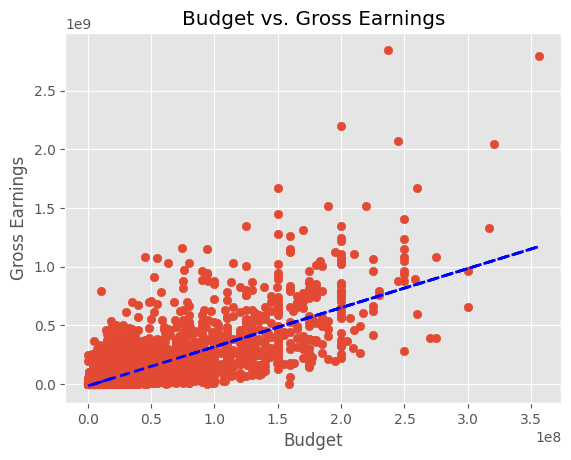

In [139]:
# scatter plot of budget vs gross revenue
plt.style.use('ggplot')
x=df_cleaned['budget']
y=df_cleaned['gross']
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="blue", linewidth=2, linestyle="--", label="Linear Trendline")
plt.show()

In [140]:
print(f"Linear Trendline: y = {p[1]:.6f}x + {p[0]:.6f}")

Linear Trendline: y = 3.335072x + -16863517.225032


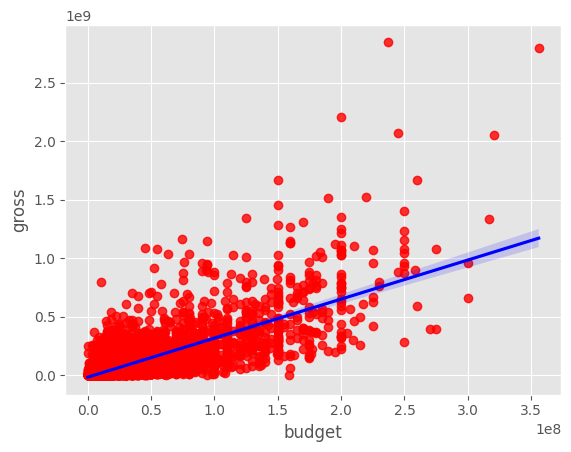

In [142]:
# plot budget vs gross revenue using seaborn
sns.regplot(x='budget',y='gross',data=df_cleaned, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [154]:
df_cleaned.corr(method='pearson', numeric_only=True) #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [155]:
# high correlation between gross revenue and budget
# prediction 1 therefore holds

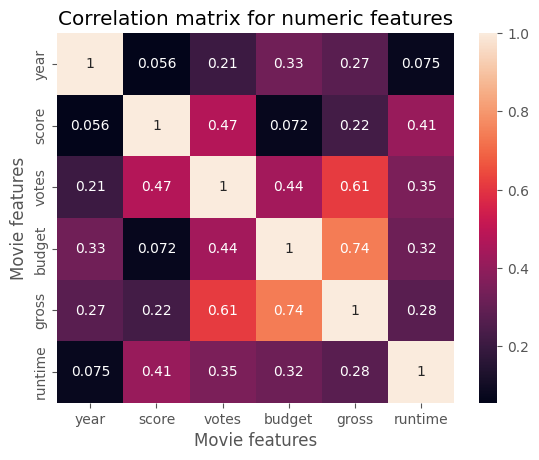

In [157]:
# visualize the correlation matrix
correlation_matrix = df_cleaned.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [159]:
df_numerized = df_cleaned.copy()
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,2
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,2
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,2
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,2
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,42
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,42
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,42
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,42


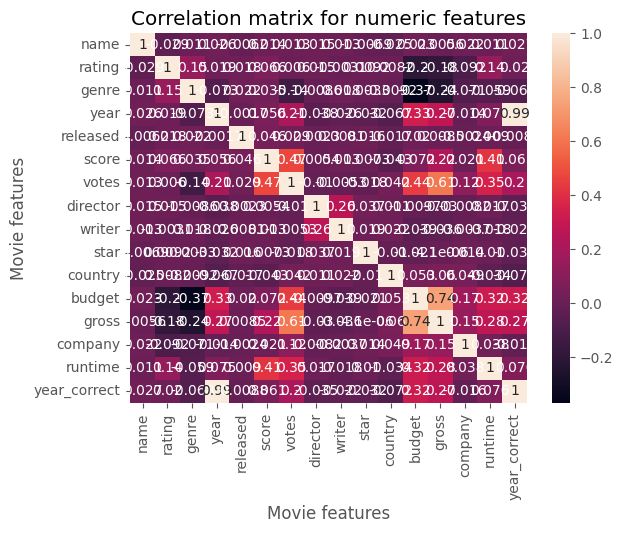

In [163]:
# visualize the correlation matrix
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [165]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026784
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019749
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.067962
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.994821
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.008821
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061059
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.202953
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035162
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.022050
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.031631


In [175]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()

In [176]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs[(sorted_pairs)>0.5]

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
year_correct  year_correct    1.000000
              year            0.994821
year          year_correct    0.994821
budget        gross           0.740247
gross         budget          0.740247
              votes           0.614751
votes         gross           0.614751
dtype: float64

In [ ]:
# votes and budget have the highest correlations to gross revenue
# prediction 2 therefore does not hold.